In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = r"C:\Users\HP\Desktop\Customer Churn Analysis\Data\Prediction_Data.xlsx"
sheet_name = 'vw_churndata'
data = pd.read_excel(file_path, sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals   
0   19877-DEL    Male   35      No        Delhi                    7  \
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...   
0                27        NaN           Yes             No  ...  \
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds   
0      Credit Card           65.6        593.30          0.00  \
1      Credit Card          

In [4]:
#drop unnecessary columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
print(data.head())

   Gender  Age Married        State  Number_of_Referrals  Tenure_in_Months   
0    Male   35      No        Delhi                    7                27  \
1  Female   45     Yes  Maharashtra                   14                13   
2    Male   51      No  West Bengal                    4                35   
3    Male   79      No    Karnataka                    3                21   
4  Female   80      No   Tamil Nadu                    3                 8   

  Value_Deal Phone_Service Multiple_Lines Internet_Service  ...   
0        NaN           Yes             No              Yes  ...  \
1        NaN           Yes            Yes              Yes  ...   
2     Deal 5           Yes             No              Yes  ...   
3     Deal 4           Yes             No              Yes  ...   
4        NaN           Yes             No              Yes  ...   

         Contract Paperless_Billing   Payment_Method Monthly_Charge   
0        One Year               Yes      Credit Card     

Why to encode variables -> essential for preparing data for machine learning models. To get correct estimations

Label Encoding: each category is assigned a value from 0 to n-1 where n is the number of categories.

In [5]:
columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method']

label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le #storing the encoder for future use

In [6]:
#Target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
#Split data into training and testing sets
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Training the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
# Make predictions
y_pred = log_reg.predict(X_test)

In [9]:
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[606  92]
 [105 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       698
           1       0.68      0.65      0.67       302

    accuracy                           0.80      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.80      0.80      0.80      1000



Confusion matrix: a table used to evaluate performance of a classfication model. Shows no. of true positives, false positives, true negatives and false negatives for each class in dataset.

Coefficients: estimated parameters, shows how independent and dependent variables relate to one another.

Intercept: constant term, represents the value of the dependent variable when all independent variables are equal to zero.

In [10]:
# Extract coefficients and feature names
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": log_reg.coef_[0]})
coefficients['Intercept'] = log_reg.intercept_[0]   

In [11]:
coefficients.to_csv('logistic_regression_coefficients.csv', index=False)
print("Model coefficients saved to CSV")

Model coefficients saved to CSV


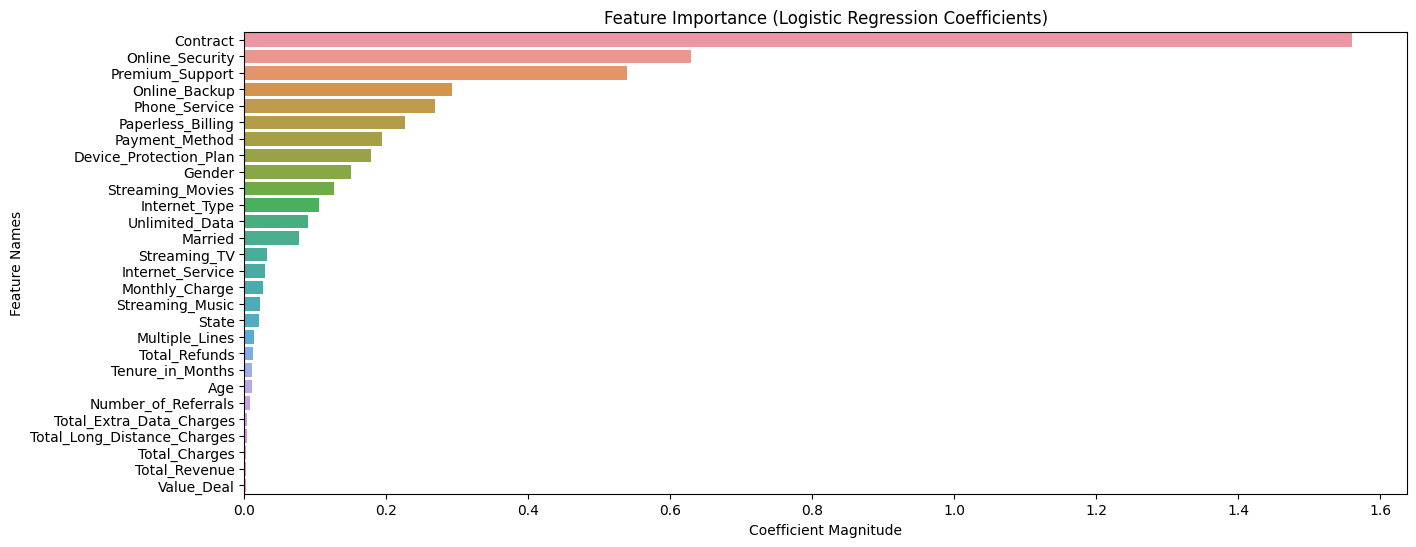

In [12]:
# using absolute values of coefficients for better visualization
feature_importance = np.abs(log_reg.coef_[0])
indices = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x=feature_importance[indices], y=X.columns[indices])
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.show()

Predictions for join data

In [13]:
sheet_name = 'vw_joindata'
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals   
0   93520-GUJ  Female   67      No         Gujarat                   13  \
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...   
0                19     Deal 5           Yes            Yes  ...  \
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds   
0  Bank Withdrawal          72.10          72.1           0.0  \
1      Cre

Copy of data to avoid errors

In [14]:
original_data = new_data.copy()

In [15]:
customer_ids = new_data['Customer_ID']

In [16]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = log_reg.predict(new_data)

In [17]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [18]:
# Filter records predicted as "Churned"
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

In [19]:
# Save results to a CSV file
churned_customers.to_csv(r"C:\Users\HP\Desktop\Customer Churn Analysis\Predictions.csv", index=False)
print("Predictions saved to Predictions.csv")

Predictions saved to Predictions.csv


In [20]:
print("Number of Dimensions: ", X.shape[1])

Number of Dimensions:  28


LDA for Dimentionality Reduction

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [22]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [23]:
# Retrain model using LDA-transformed data
log_reg = LogisticRegression()
log_reg.fit(X_train_lda, y_train)

LogisticRegression()

In [24]:
# Predict and Evaluate
y_pred = log_reg.predict(X_test_lda)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[613  85]
 [116 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       698
           1       0.69      0.62      0.65       302

    accuracy                           0.80      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.79      0.80      0.80      1000



In [25]:
print("Number of Dimensions: ", X_train_lda.shape[1])

Number of Dimensions:  1


In [26]:
print("Number of Dimensions: ", X_test_lda.shape[1])

Number of Dimensions:  1


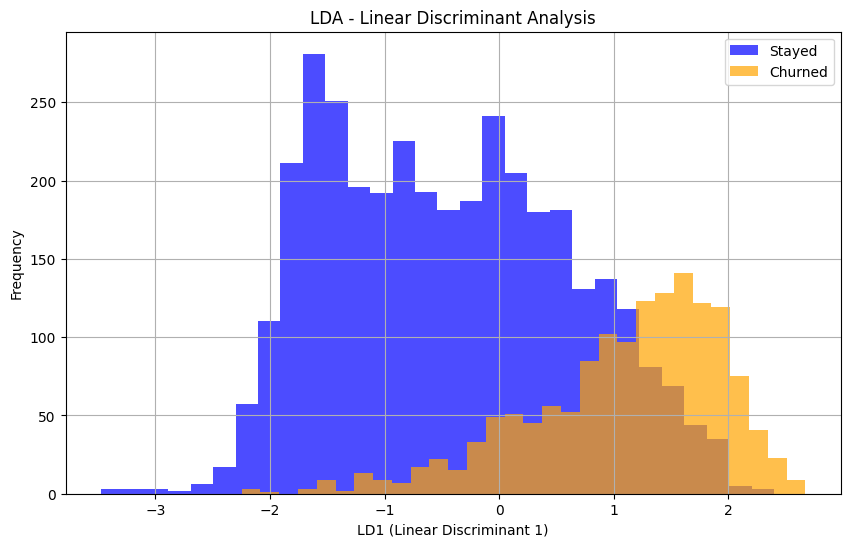

In [41]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
labels = ['Stayed', 'Churned']
for i, label in enumerate(np.unique(y)):
    plt.hist(X_lda[y == label], bins=30, alpha=0.7, color=colors[i], label=labels[i])

plt.title('LDA - Linear Discriminant Analysis')
plt.xlabel('LD1 (Linear Discriminant 1)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Applying PCA

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Customer_Status'] = y.values

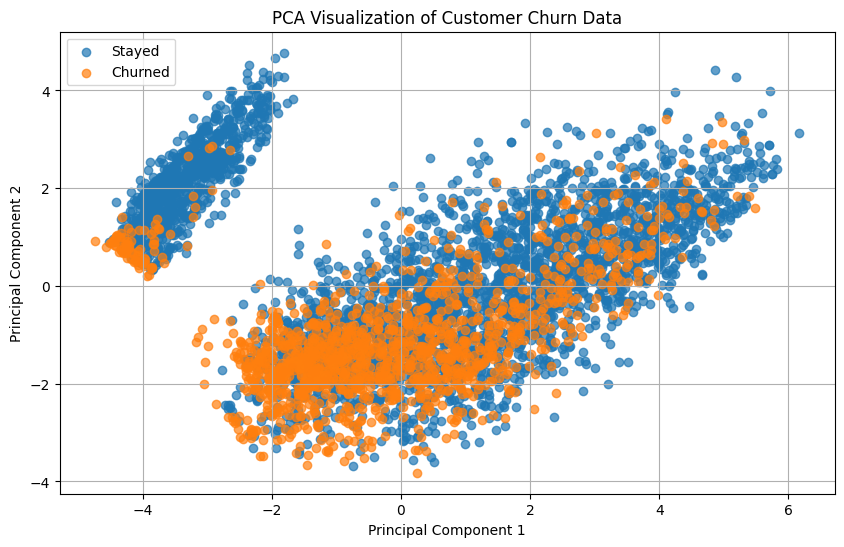

In [40]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
for status in pca_df['Customer_Status'].unique():
    plt.scatter(
        pca_df[pca_df['Customer_Status'] == status]['PC1'],
        pca_df[pca_df['Customer_Status'] == status]['PC2'],
        label='Churned' if status == 1 else 'Stayed',
        alpha=0.7
    )

plt.title('PCA Visualization of Customer Churn Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()